In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, glob
import librosa
import librosa.display
import soundfile as sf
from scipy.signal import chirp, spectrogram, stft
%matplotlib inline

In [64]:
obj_two_data = pd.read_excel('object2.xlsx', header = None)
obj_one_data = pd.read_excel('object1data.xlsx', header = None)
obj_one_data.shape

(241, 16384)

In [233]:
array_obj_two = np.array(obj_two_data)
array_obj_two = np.delete(array_obj_two, 1, 0)
# array_obj_two = np.delete(array_obj_two, 1, 0)
array_obj_one = np.array(obj_one_data)
array_obj_one = np.delete(array_obj_one, 1, 0)
array_obj_one = np.delete(array_obj_one, 1, 0)

# mfccs_obj_two = array_obj_two[np.logical_not(np.isnan(array_obj_two))]
# mfccs_obj_one = array_obj_one[np.logical_not(np.isnan(array_obj_one))]
spectral_rolloff = librosa.feature.spectral_rolloff(array_obj_two[3], sr=22050)
spectral_rolloff[0][1]

5792.431640625

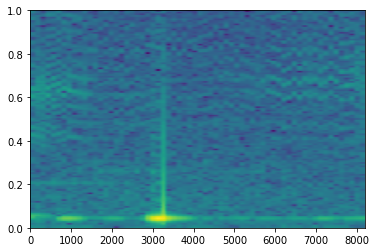

In [240]:
## Processing for object2
max_values_obj2 = []
max_value = 0;
mfccs_obj_two_array = []
spectral_roll_off_obj_two_array = []

for i in range(array_obj_two.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_two[i], NFFT=256, Fs=2, noverlap=0);
    max_value = np.amax(abs(spectrum[0]))
    mfccs = np.amax(librosa.feature.mfcc(np.array(array_obj_two[i]), sr=22050))
    spectral_rolloff_obj2 = librosa.feature.spectral_rolloff(array_obj_two[i], sr=22050)
    for j in range(len(spectral_rolloff_obj2)):
        spectral_roll_off_obj_two_array.append(spectral_rolloff_obj2[0][j])
    max_values_obj2.append(max_value)
    mfccs_obj_two_array.append(mfccs)

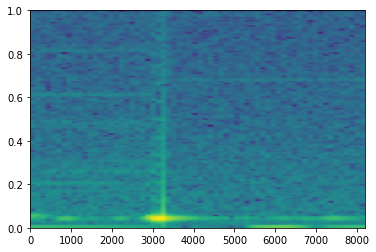

In [241]:
## Processing for object1
max_values_obj1 = []
max_value = 0;
mfccs_obj_one_array = []
spectral_roll_off_obj_one_array = []

for i in range(array_obj_one.shape[0]):
    spectrum, freqs, t, im = plt.specgram(array_obj_one[i], NFFT=256, Fs=2, noverlap=0)
    max_value = np.amax(abs(spectrum[0]))
    mfccs = np.amax(librosa.feature.mfcc(np.float64(array_obj_one[i]), sr=22050))
    spectral_rolloff_obj_one = librosa.feature.spectral_rolloff(np.float64(array_obj_two[i]), sr=22050)
    for j in range(len(spectral_rolloff_obj_one)):
        spectral_roll_off_obj_one_array.append(spectral_rolloff_obj_one[0][j])
    max_values_obj1.append(max_value)
    mfccs_obj_one_array.append(mfccs)

In [243]:
## Merging and creating data frame
max_freq_dataframe_obj_one = pd.DataFrame(max_values_obj1[1:], columns=["MaxFrequency"])
max_freq_dataframe_obj_two = pd.DataFrame(max_values_obj2[2:], columns=["MaxFrequency"])
mfccs_dataframe_obj_one = pd.DataFrame(mfccs_obj_one_array, columns=["MFCCS"])
mfccs_dataframe_obj_two = pd.DataFrame(mfccs_obj_two_array, columns=["MFCCS"])
spectral_roll_off_obj_one = pd.DataFrame(spectral_roll_off_obj_one_array, columns=["SpectralRollOff"])
spectral_roll_off_obj_two = pd.DataFrame(spectral_roll_off_obj_two_array, columns=["SpectralRollOff"])
print(max_freq_dataframe_obj_one.shape)
print(max_freq_dataframe_obj_two.shape)
print(mfccs_dataframe_obj_one.shape)
print(mfccs_dataframe_obj_two.shape)

(238, 1)
(329, 1)
(239, 1)
(331, 1)


In [244]:
mfccs_dataframe_obj_one["Target"] = 0
mfccs_dataframe_obj_two["Target"] = 1
max_freq_dataframe_obj_one["Target"] = 0
max_freq_dataframe_obj_two["Target"] = 1
spectral_roll_off_obj_one["Target"] = 0
spectral_roll_off_obj_two["Target"] = 1

frames = [mfccs_dataframe_obj_one, mfccs_dataframe_obj_two]
frames_freq = [max_freq_dataframe_obj_one, max_freq_dataframe_obj_two]
spectogram_rolloff = [spectral_roll_off_obj_one, spectral_roll_off_obj_two]
final_data_frame= pd.concat(frames)
final_freq_frame = pd.concat(frames_freq)
final_spe_roll = pd.concat(spectogram_rolloff)

# frames_final = [final_freq_frame, final_data_frame.reindex(final_freq_frame.index)]

# final_data_frame = pd.concat(frames_final, axis=1)
# frames_final[final_freq_frame]
print(final_data_frame.shape)
print(final_freq_frame.shape)
frames_final = pd.merge(final_data_frame, final_freq_frame)
frames_final = pd.merge(frames_final, )

(570, 2)
(567, 2)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [185]:
frames_final

,MFCCS,Target,MaxFrequency
0,475.026441,0,3422.275998
1,475.026441,0,6976.451998
2,475.026441,0,2041.878745
3,475.026441,0,235411.825944
4,475.026441,0,4408.860691
...,...,...,...
165776,580.568244,1,23740.291568
165777,580.568244,1,7433.396133
165778,580.568244,1,717.293777
165779,580.568244,1,107224.186211


In [186]:
from sklearn.model_selection import train_test_split, cross_val_score

# Now splitting the data to test and training sets, its important never let our model to learn from test.
X = final_data_frame.drop("Target", axis =1)
y = final_data_frame["Target"]
np.random.seed(42)

# split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20 % data to be used for testing

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# put models in the dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decission Tree": tree.DecisionTreeClassifier()}

# Create a function to fit and score models
# fits and evaluates the machine learning models
# X_train: training data(no labels)
# X_test: testing data(no labels)
# y_train: training labels
# y_test: testing labels
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # set a random seed
    np.random.seed(42)
    #Male a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        # fit the mdoel to the data
        model.fit(X_train, y_train)
        # evaluate the mdoel and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [188]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.6052631578947368,
 'KNN': 0.7719298245614035,
 'Random Forest': 0.7368421052631579,
 'Decission Tree': 0.7368421052631579}

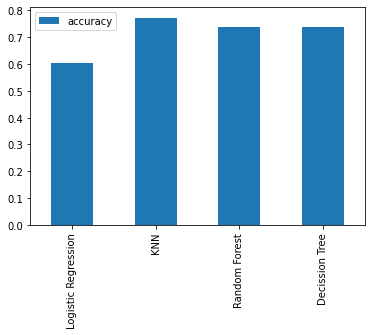

In [189]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();